In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn import preprocessing
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score

In [3]:
airline=pd.read_excel("C:/Users/Yogendra/Downloads/EastWestAirlines.xlsx")
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


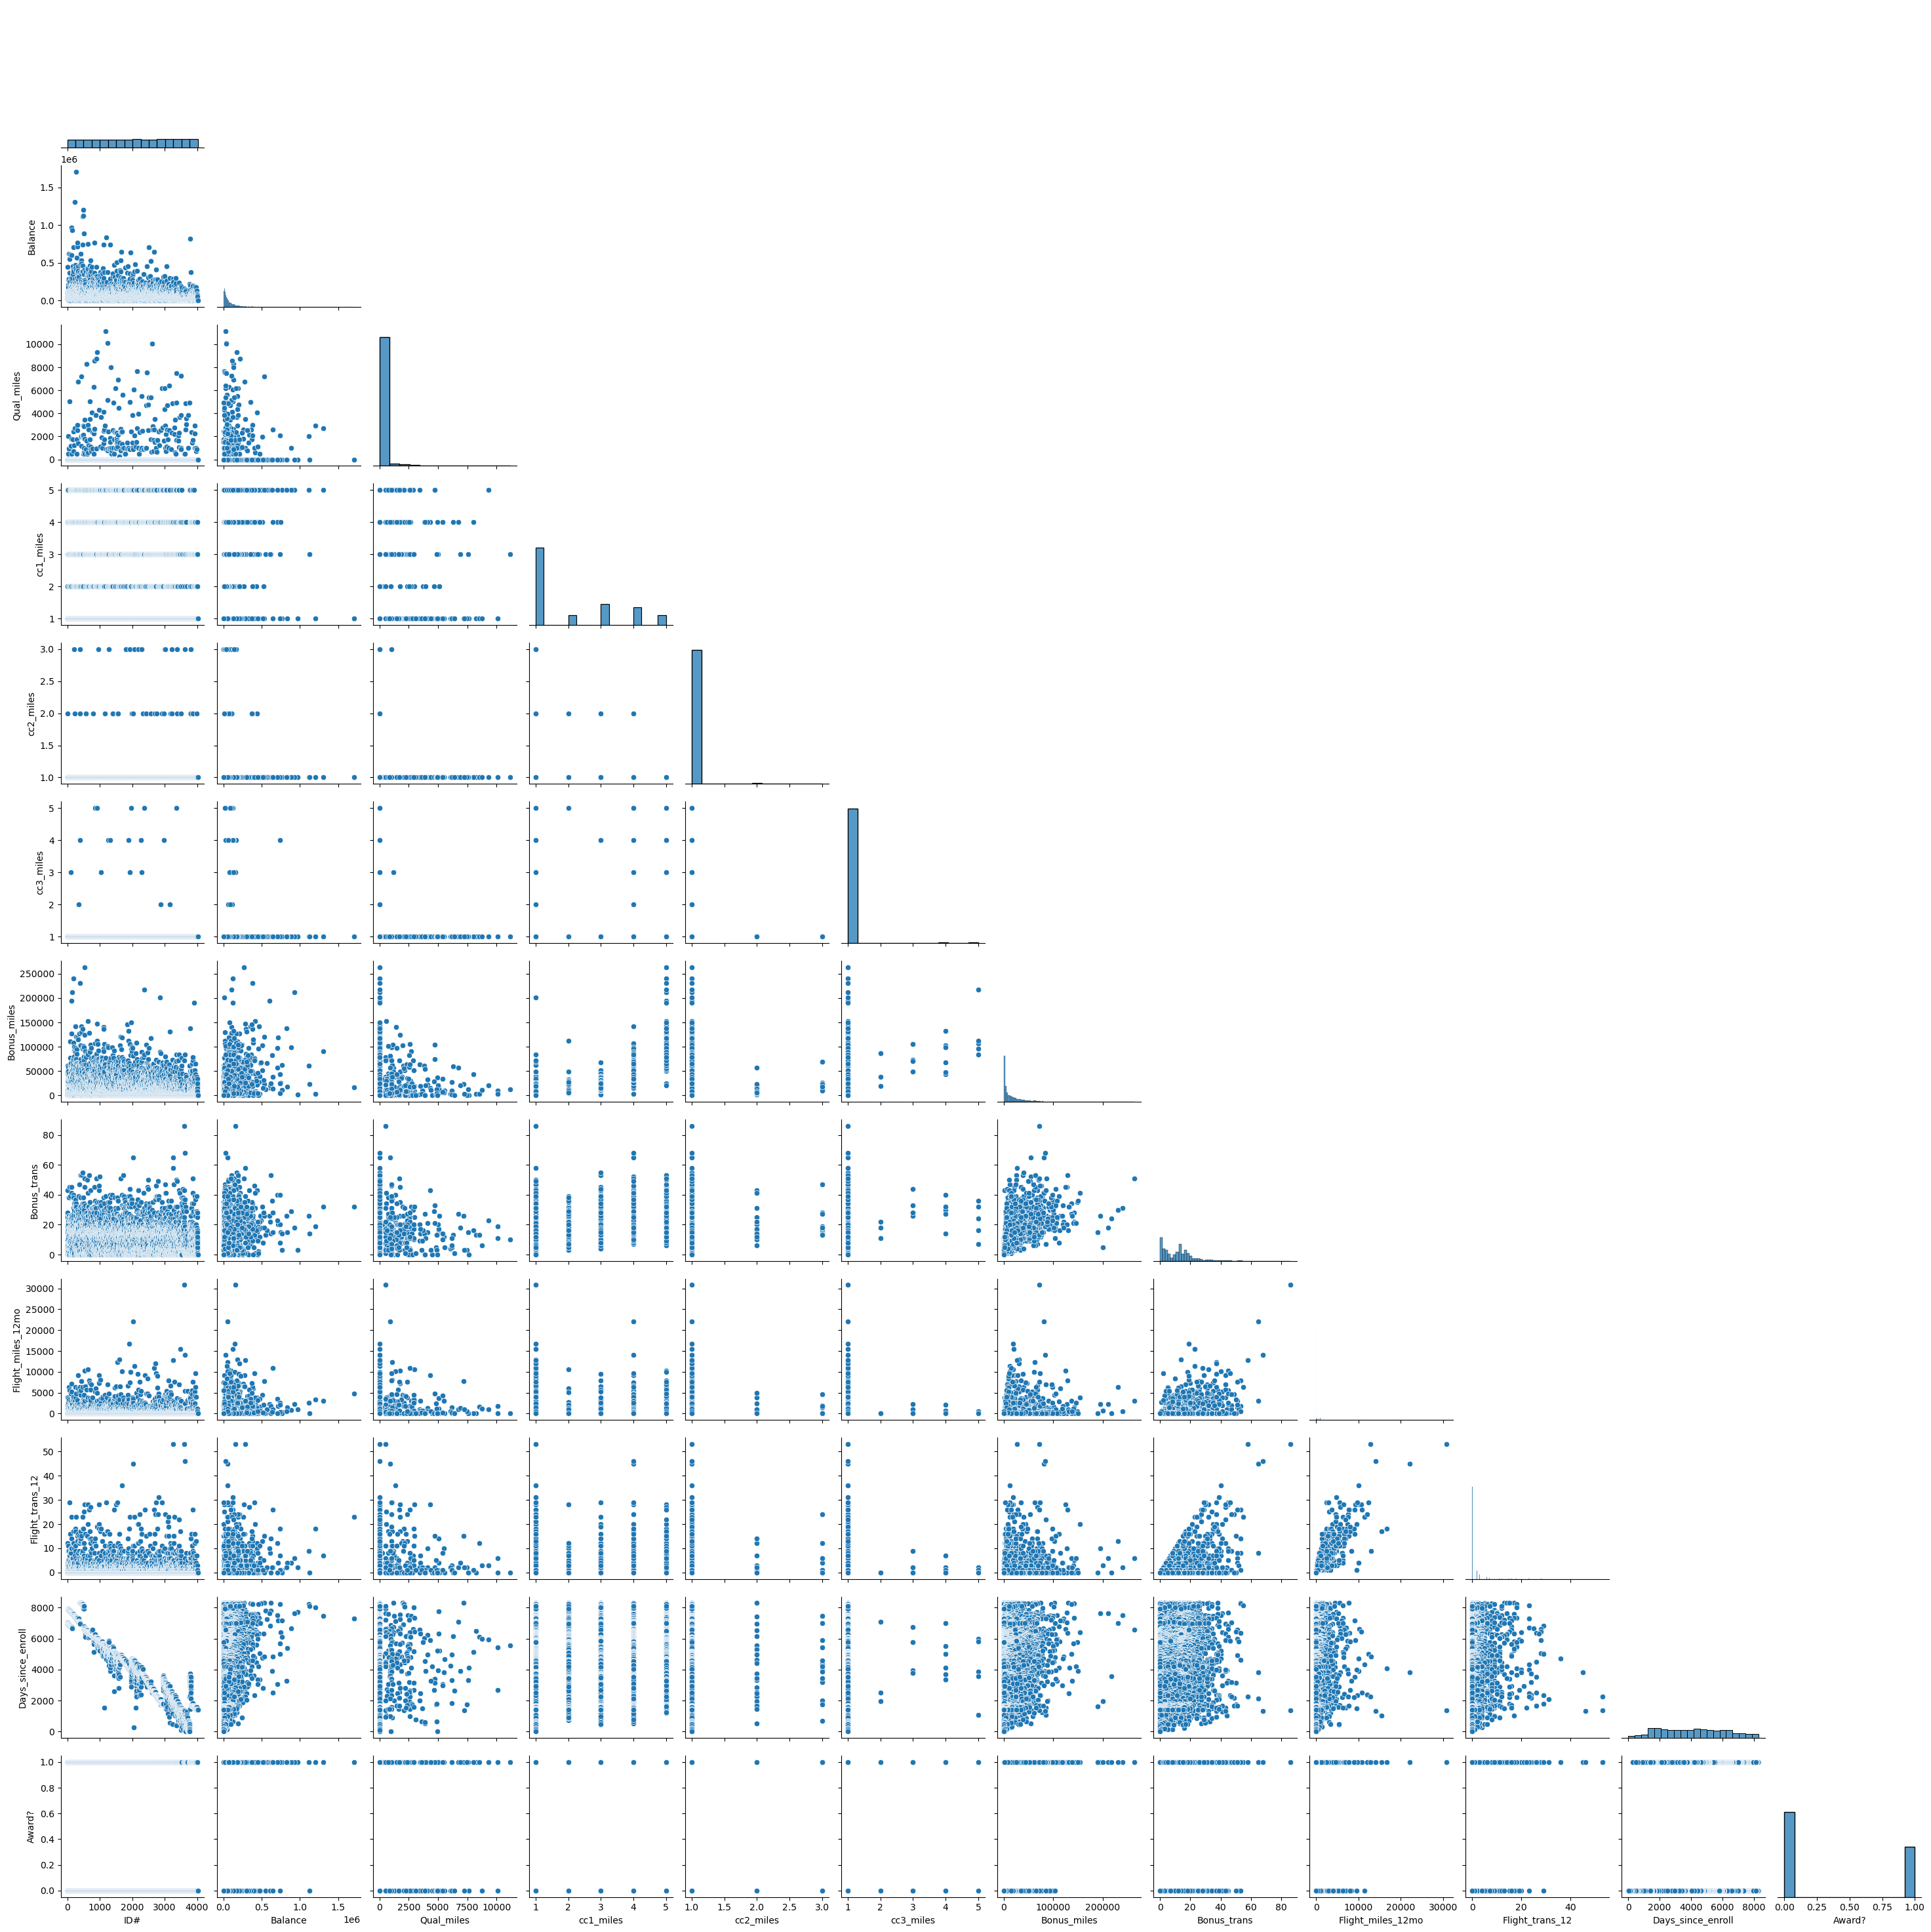

In [4]:
#Getting to know data graphically
sn.pairplot(airline, corner=True)

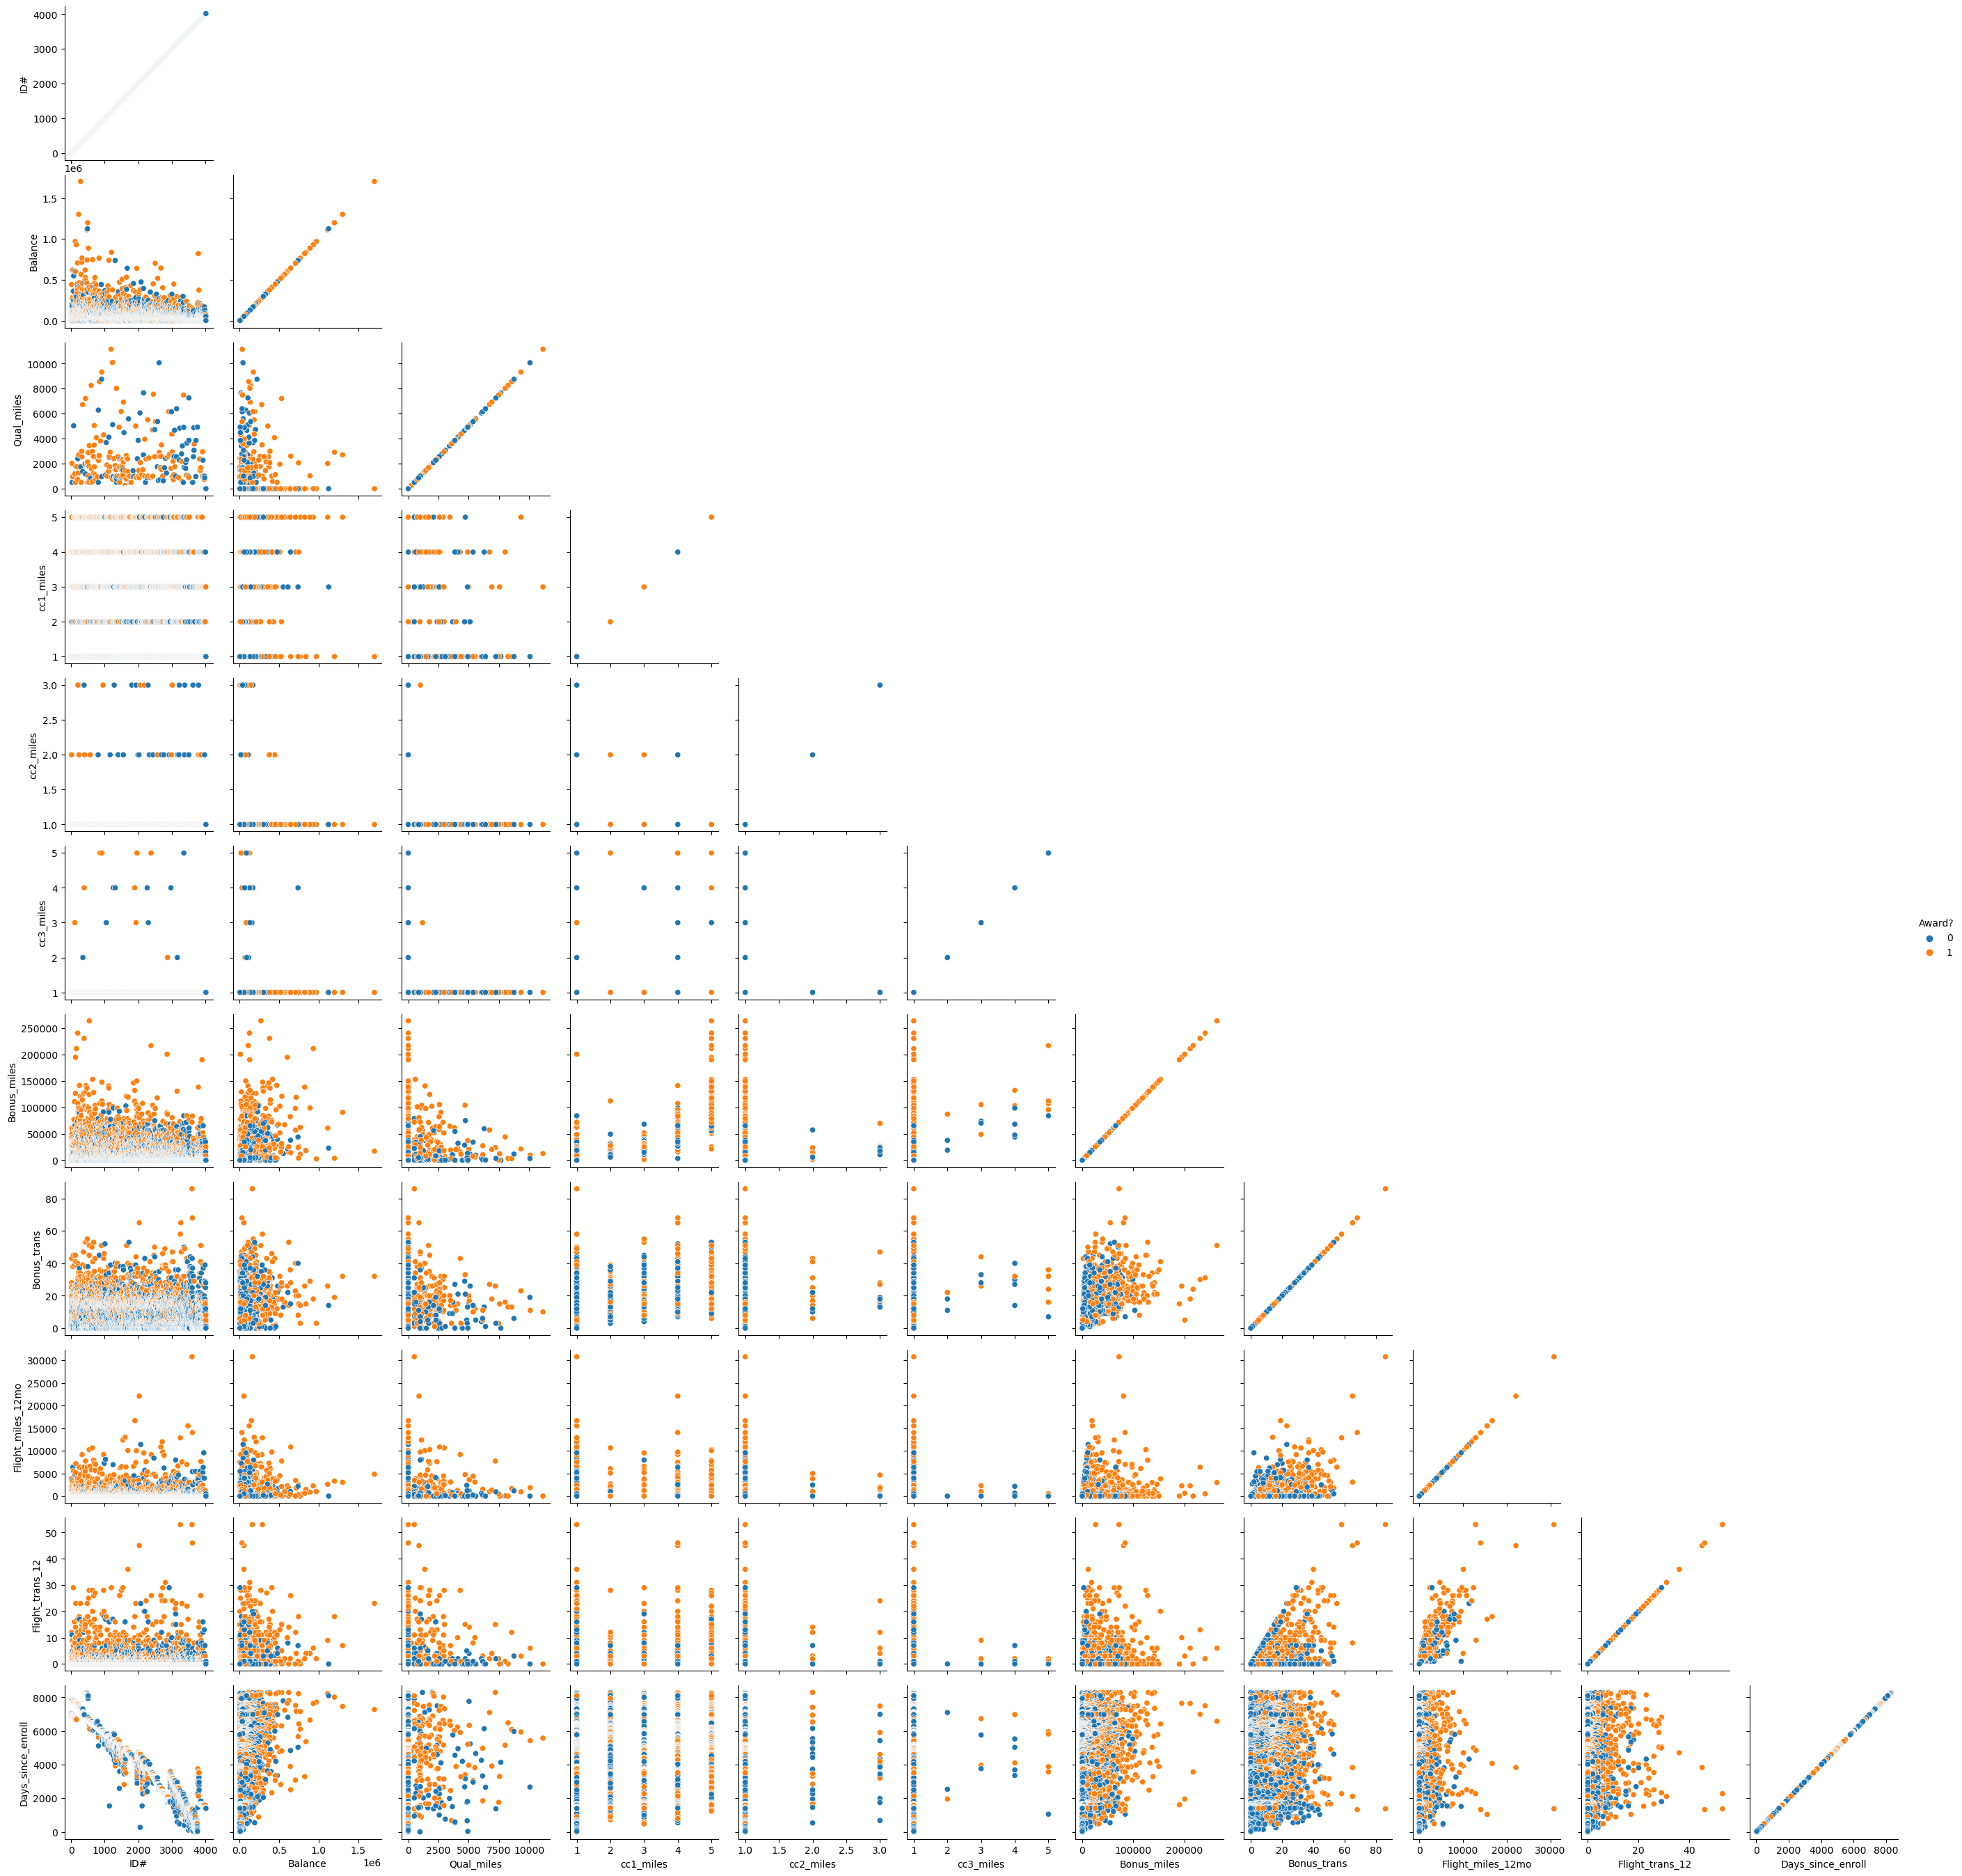

In [5]:
g = sn.PairGrid(airline, hue="Award?", corner=True)
g.map(sn.scatterplot)
g.add_legend()

In [6]:
#Data normalization
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [7]:
air_norm = norm_func(airline.iloc[:,1:])

In [29]:
#Clustering data
def agg_clust(data, num_clusters, metric):
    cluster_model = AgglomerativeClustering(n_clusters=num_clusters,
                                            affinity=metric,
                                            linkage='average')
 
    clusters = cluster_model.fit_predict(data)
 
    score = silhouette_score(data,
                             cluster_model.labels_,
                             metric=metric)
    return clusters, score

In [30]:
y_euclidean, euclidean_score = agg_clust(air_norm, 4, 'euclidean')
y_l1, l1_score = agg_clust(air_norm, 4, 'l1')
y_l2, l2_score = agg_clust(air_norm, 4, 'l2')
y_manhattan, manhattan_score = agg_clust(air_norm, 4, 'manhattan')
y_cosine, cosine_score = agg_clust(air_norm, 4, 'cosine')

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 

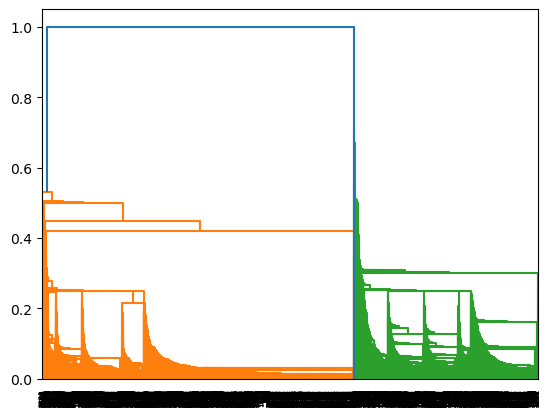

In [10]:
#Dendogram
dendrogram = sch.dendrogram(sch.linkage(air_norm, method='single'))

<BarContainer object of 5 artists>

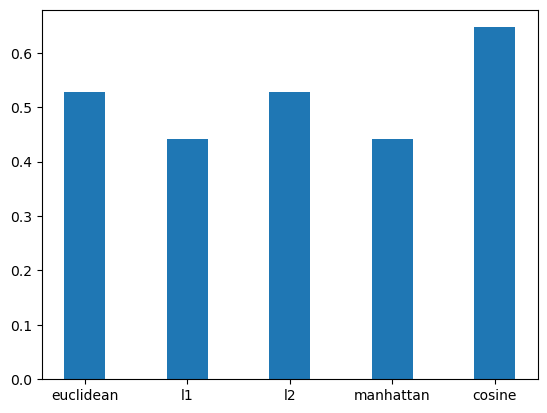

In [31]:
#Getting clustering score
silhouette_scores = {'euclidean': euclidean_score,
                     'l1': l1_score,
                     'l2': l2_score,
                     'manhattan': manhattan_score,
                     'cosine': cosine_score}
plt.bar(list(silhouette_scores.keys()),
        list(silhouette_scores.values()),
        width=0.4)

C:\ProgramData\anaconda3\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


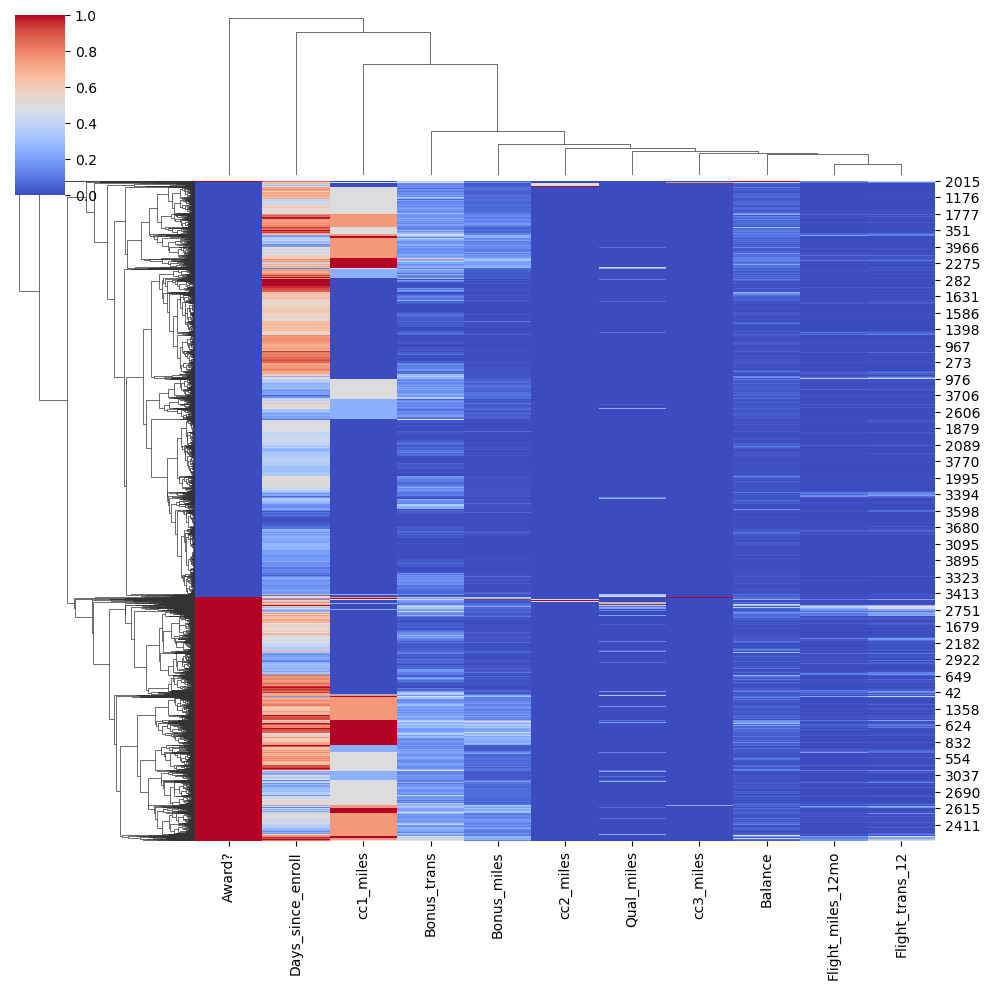

In [12]:
#Cluster Visualizations
sn.clustermap(air_norm, cmap='coolwarm', figsize=(10, 10))

In [27]:
X = airline.iloc[:, [6,8]].values

In [15]:
def plot_clusters(data, y, metric):
    plt.scatter(data[y==0, 0], data[y==0, 1], c='red',
                label ='Cluster 1')
    plt.scatter(data[y==1, 0], data[y==1, 1], c='blue',
                label ='Cluster 2')
    plt.scatter(data[y==2, 0], data[y==2, 1], c='green',
                label ='Cluster 3')
    plt.scatter(data[y==3, 0], data[y==3, 1], c='purple',
                label ='Cluster 4')
    plt.title(f'Clusters of flyers (using {metric} distance metric)')
    plt.legend()
    plt.show()

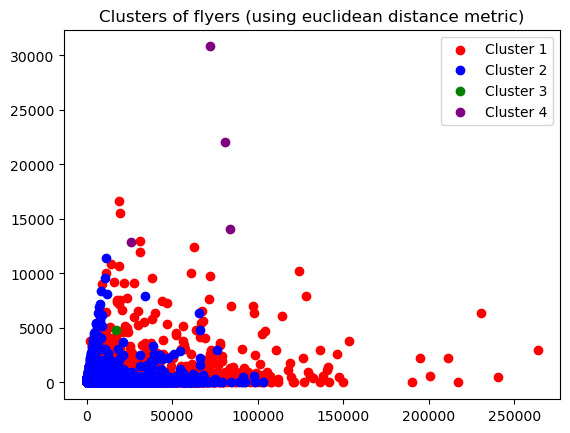

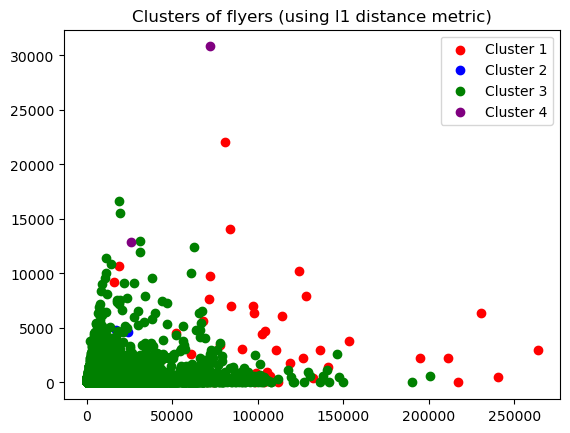

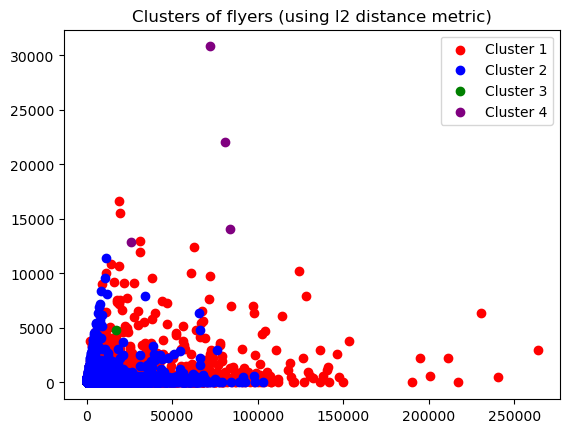

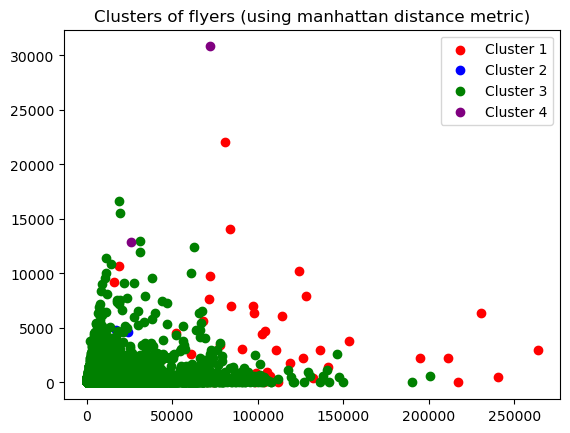

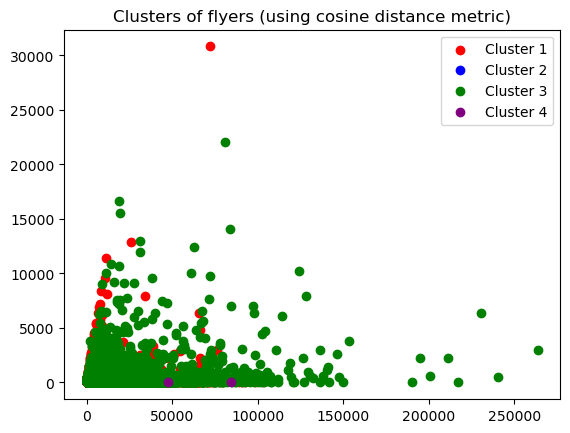

In [28]:
plot_clusters(X, y_euclidean, 'euclidean')
plot_clusters(X, y_l1, 'l1')
plot_clusters(X, y_l2, 'l2')
plot_clusters(X, y_manhattan, 'manhattan')
plot_clusters(X, y_cosine, 'cosine')